In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
data = pd.read_csv('AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-07-2016,23.847500,23.850000,23.615000,23.747499,21.927603,110820800
1,06-07-2016,23.650000,23.915001,23.592501,23.882500,22.052250,123796400
2,07-07-2016,23.924999,24.125000,23.905001,23.985001,22.146894,100558400
3,08-07-2016,24.122499,24.222500,24.012501,24.170000,22.317719,115648400
4,11-07-2016,24.187500,24.412500,24.182501,24.245001,22.386971,95179600
...,...,...,...,...,...,...,...
1755,26-06-2023,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
1756,27-06-2023,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
1757,28-06-2023,187.929993,189.899994,187.600006,189.250000,189.250000,51216800
1758,29-06-2023,189.080002,190.070007,188.940002,189.589996,189.589996,46347300


information::

Date : Date of trading

Open : Price at which security first trades

High : Highest Price of the trading day

Low : Lowest Price of the trading day

Close : Last Price the stock traded during the trading day

Adj Close : Price that is adjusts Coroporate Actions on Closing Price

Volume : Number of Shares that changed hands during the trading day

In [271]:
# changing the type of the columns
data['Date'] = data['Date'].apply(pd.to_datetime)

C:\Users\sandeep sharma\AppData\Local\Temp\ipykernel_19140\274314120.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = data['Date'].apply(pd.to_datetime)


In [272]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date',inplace=True)
data['Date'] = data.index
data.head()

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2016-05-07,23.847500,23.850000,23.615000,23.747499,21.927603,110820800,2016-05-07
2016-06-07,23.650000,23.915001,23.592501,23.882500,22.052250,123796400,2016-06-07
2016-07-07,23.924999,24.125000,23.905001,23.985001,22.146894,100558400,2016-07-07
2016-08-07,24.122499,24.222500,24.012501,24.170000,22.317719,115648400,2016-08-07
2016-11-07,24.187500,24.412500,24.182501,24.245001,22.386971,95179600,2016-11-07


In [273]:
col_order = ['Adj Close']
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])
data_feature_selected = data_feature_selected.reindex(columns=col_order) #reindexing
data_feature_selected

,Adj Close
Date,
2016-05-07,21.927603
2016-06-07,22.052250
2016-07-07,22.146894
2016-08-07,22.317719
2016-11-07,22.386971
...,...
2023-06-26,185.270004
2023-06-27,188.059998
2023-06-28,189.250000


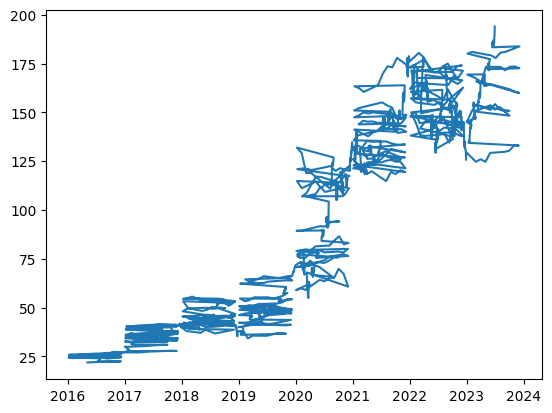

In [274]:
plt.plot(data['Adj Close'])

In [275]:
# as lstm are very sensetive to the scale of the data, so we apply minmax scaler

In [276]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_feature_selected = scaler.fit_transform(np.array(data_feature_selected).reshape(-1,1))

In [277]:
df1 = data_feature_selected

In [278]:
training_size = int(len(df1)*0.7)
test_size = len(df1)-training_size
training_data, test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [279]:
training_data, test_data

(array([[0.        ],
        [0.00072451],
        [0.00127463],
        ...,
        [0.59316519],
        [0.60275968],
        [0.60161063]]),
 array([[0.60132331],
        [0.59230333],
        [0.58845418],
        [0.58655817],
        [0.59103938],
        [0.58230672],
        [0.59580799],
        [0.59586542],
        [0.60069133],
        [0.60293205],
        [0.59707194],
        [0.60419596],
        [0.62217844],
        [0.61735244],
        [0.62028238],
        [0.62970458],
        [0.62206359],
        [0.63263479],
        [0.64228661],
        [0.64067809],
        [0.63901183],
        [0.63728828],
        [0.64688272],
        [0.65578784],
        [0.65940727],
        [0.6611883 ],
        [0.67664288],
        [0.68847803],
        [0.70312827],
        [0.6954871 ],
        [0.70623063],
        [0.70272588],
        [0.70927561],
        [0.72944116],
        [0.72559193],
        [0.71358435],
        [0.69094847],
        [0.71220555],
        [0.707896

In [280]:
training_data.shape, test_data.shape

((1232, 1), (528, 1))

In [281]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    datax,datay = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        datax.append(a)
        datay.append(dataset[i+time_step,0])
    return np.array(datax), np.array(datay)

In [282]:
time_step = 100
x_train, y_train = create_dataset(training_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [283]:
print(x_train)
print(x_train.shape)

[[0.         0.00072451 0.00127463 ... 0.02178271 0.0240472  0.02414207]
 [0.00072451 0.00127463 0.00226756 ... 0.0240472  0.02414207 0.02336919]
 [0.00127463 0.00226756 0.00267009 ... 0.02414207 0.02336919 0.02412854]
 ...
 [0.62832382 0.65535467 0.64493167 ... 0.59799106 0.58983294 0.5889137 ]
 [0.65535467 0.64493167 0.63834575 ... 0.58983294 0.5889137  0.60396615]
 [0.64493167 0.63834575 0.63244703 ... 0.5889137  0.60396615 0.59316519]]
(1131, 100)


In [284]:
print(x_test)
print(x_test.shape)

[[0.60132331 0.59230333 0.58845418 ... 0.68331377 0.69971213 0.70592615]
 [0.59230333 0.58845418 0.58655817 ... 0.69971213 0.70592615 0.71576538]
 [0.58845418 0.58655817 0.59103938 ... 0.70592615 0.71576538 0.72848107]
 ...
 [0.71540565 0.74664422 0.76797217 ... 0.95948672 0.95762668 0.94943109]
 [0.74664422 0.76797217 0.75191829 ... 0.95762668 0.94943109 0.96564799]
 [0.76797217 0.75191829 0.76884153 ... 0.94943109 0.96564799 0.9725649 ]]
(427, 100)


In [285]:
# resamples input to be [samples, time_step,features] which is required for lstm
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [286]:
x_train.shape, x_test.shape

((1131, 100, 1), (427, 100, 1))

In [287]:
# creating the stacked LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [288]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_9 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_10 (LSTM)              (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [289]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 [==============================] - 8s 182ms/step - loss: 0.0285 - val_loss: 0.0715
Epoch 2/100
18/18 [==============================] - 2s 131ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 3/100
18/18 [==============================] - 2s 130ms/step - loss: 7.1550e-04 - val_loss: 0.0024
Epoch 4/100
18/18 [==============================] - 2s 139ms/step - loss: 5.5222e-04 - val_loss: 0.0023
Epoch 5/100
18/18 [==============================] - 2s 134ms/step - loss: 5.3336e-04 - val_loss: 0.0027
Epoch 6/100
18/18 [==============================] - 2s 131ms/step - loss: 5.0044e-04 - val_loss: 0.0031
Epoch 7/100
18/18 [==============================] - 2s 133ms/step - loss: 5.0637e-04 - val_loss: 0.0035
Epoch 8/100
18/18 [==============================] - 2s 136ms/step - loss: 4.8547e-04 - val_loss: 0.0024
Epoch 9/100
18/18 [==============================] - 8s 490ms/step - loss: 4.8964e-04 - val_loss: 0.0045
Epoch 10/100
18/18 [==============================] - 3s 175ms/

In [290]:
import tensorflow as tf

In [291]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

14/14 [==============================] - 0s 26ms/step


In [292]:
# Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [293]:
# Calculate Performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

68.87197737401385

In [294]:
math.sqrt(mean_squared_error(y_test,test_predict))

149.2515392813086

In [295]:
look_back = 100
trainpredictplot = np.empty_like(df1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:] = train_predict

testpredictplot = np.empty_like(df1)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict

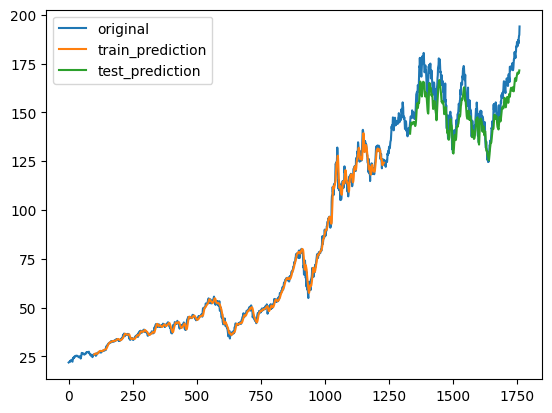

In [296]:
plt.plot(scaler.inverse_transform(df1),label="original")
plt.plot(trainpredictplot,label="train_prediction")
plt.plot(testpredictplot,label="test_prediction")
plt.legend()
plt.show()

## Prediction of future 50 days

In [297]:
len(test_data)

528

In [298]:
x_input=test_data[428:].reshape(1,-1)
x_input.shape

(1, 100)

In [299]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [300]:
len(temp_input)

100

In [301]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<50):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8836188]
101
1 day input [0.75301949 0.74693397 0.74908165 0.76556649 0.76179353 0.77415711
 0.76475389 0.75802065 0.73439629 0.73689226 0.73973644 0.72412239
 0.73114582 0.72818554 0.71599607 0.71947883 0.74919775 0.76545039
 0.75250641 0.75987804 0.74664378 0.73451239 0.74594728 0.75825277
 0.76057463 0.77717547 0.77224162 0.78617239 0.79708479 0.78866837
 0.79505321 0.80271523 0.79128034 0.78762348 0.8057336  0.81496271
 0.82970608 0.8370778  0.83394343 0.82308894 0.82831299 0.81304714
 0.8059077  0.80184454 0.83353704 0.83150555 0.83162156 0.83881918
 0.84555241 0.83986389 0.83040266 0.83220205 0.82314704 0.82308894
 0.85007987 0.85745152 0.85692912 0.85083438 0.84450753 0.83487203
 0.88003108 0.8796247  0.86958299 0.87997299 0.88107588 0.87561209
 0.87270583 0.87270583 0.87630957 0.89002712 0.8906665  0.88508644
 0.86974139 0.87136889 0.87805334 0.89223582 0.90310529 0.90281465
 0.91932218 0.92432096 0.91635783 0.91420723 0.90612783 0.92211226
 0.92437914 0.94082849 0.93803851 

In [302]:
day_new = np.arange(1,101)
day_pred = np.arange(101,151)

In [303]:
df2 = df1.tolist()
df2.extend(lst_output)

In [304]:
len(df1)

1760

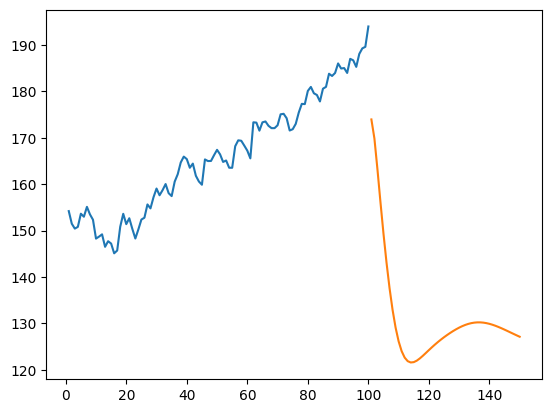

In [305]:
plt.plot(day_new,scaler.inverse_transform(df1[1660:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

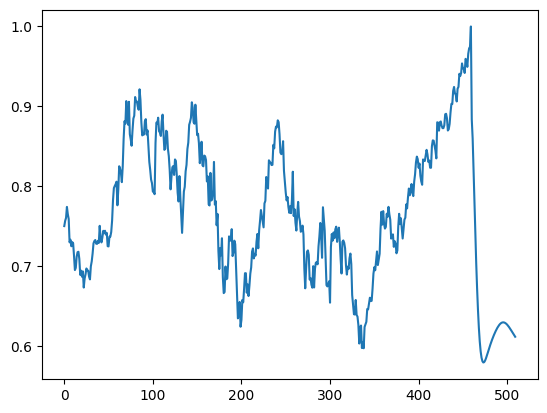

In [306]:
df2 = df1.tolist()
df2.extend(lst_output)
plt.plot(df2[1300:])

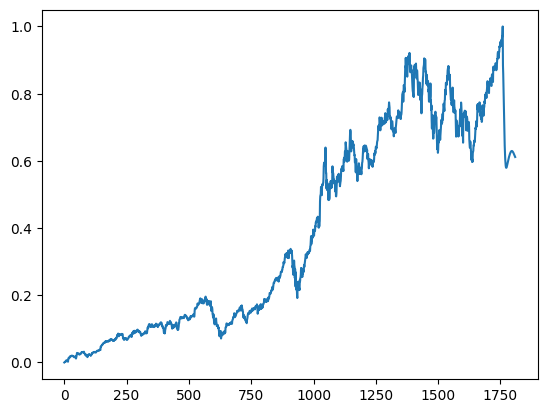

In [307]:
plt.plot(df2)